In [1]:
import pandas as pd
from glob import glob
import ahocorasick
import pyarrow.parquet as pq
from Bio import SeqIO
from tqdm import tqdm
import matplotlib.pyplot as plt
from pyopenms import *
import os

In [2]:
def get_gca_usi_number(file):
    df = pd.read_table(file, sep = "," ,compression="gzip")
    return df['usi'].nunique()

def get_gca_seq_number(file):
    df = pd.read_table(file, sep = "," ,compression="gzip")
    return df['sequence'].nunique()

def get_gca_seq_set(file):
    df = pd.read_table(file, sep = "," ,compression="gzip")
    return set(df['sequence'])
    
def get_gca_usi_number_from_spectrumai(file):
    df = pd.read_table(file, sep = "," ,compression="gzip")
    df = df[(df['position'] == 'non-canonical') | (df['flanking_ions_support'] == 'YES')]
    return df['usi'].nunique()

### PXD010154

In [3]:
all_gca_number1 = get_gca_usi_number("PXD010154/to-ms2pip-snr-tables/gca_peptides_for_deeplc.csv.gz")
print("Number of all-gca-PSM: {}".format(all_gca_number1))

ms2pip_gca_number1 = get_gca_usi_number("PXD010154/to-ms2pip-snr-tables/gca_peptides_for_deeplc_ms2pip_filtered.csv.gz")
print("Number of ms2pip-gca-PSM: {}".format(ms2pip_gca_number1))

ms2pip_spectrumai_gca_number1 = get_gca_usi_number_from_spectrumai("PXD010154/to-spectrumai-tables/gca_peptides_for_deeplc_ms2pip_spectrumai_filtered.csv.gz")
print("Number of ms2pip-spectrumai-gca-PSM: {}".format(ms2pip_spectrumai_gca_number1))

ms2pip_spectrumai_deeplc_gca_number1 = get_gca_usi_number("PXD010154/deeplc-tables/PXD010154_deeplc_filtered_95perc.csv.gz")
print("Number of ms2pip-spectrumai-deeplc-gca-PSM: {}".format(ms2pip_spectrumai_deeplc_gca_number1))

ms2pip_spectrumai_deeplc_gca_seq_number1 = get_gca_seq_number("PXD010154/deeplc-tables/PXD010154_deeplc_filtered_95perc.csv.gz")
print("Number of ms2pip-spectrumai-deeplc-gca-peptide-Seq: {}".format(ms2pip_spectrumai_deeplc_gca_seq_number1))

Number of all-gca-PSM: 128910
Number of ms2pip-gca-PSM: 102125
Number of ms2pip-spectrumai-gca-PSM: 61345
Number of ms2pip-spectrumai-deeplc-gca-PSM: 58147
Number of ms2pip-spectrumai-deeplc-gca-peptide-Seq: 4056


### PXD016999

In [4]:
all_gca_number2 = get_gca_usi_number("PXD016999/to-ms2pip-snr-tables/gca_peptides_for_deeplc.csv.gz")
print("Number of all-gca-PSM: {}".format(all_gca_number2))

ms2pip_gca_number2 = get_gca_usi_number("PXD016999/to-ms2pip-snr-tables/gca_peptides_for_deeplc_ms2pip_filtered.csv.gz")
print("Number of ms2pip-gca-PSM: {}".format(ms2pip_gca_number2))

ms2pip_spectrumai_gca_number2 = get_gca_usi_number_from_spectrumai("PXD016999/to-spectrumai-tables/gca_peptides_for_deeplc_ms2pip_spectrumai_filtered.csv.gz")
print("Number of ms2pip-spectrumai-gca-PSM: {}".format(ms2pip_spectrumai_gca_number2))

ms2pip_spectrumai_deeplc_gca_number2 = get_gca_usi_number("PXD016999/deeplc-tables/PXD016999_deeplc_filtered_95perc.csv.gz")
print("Number of ms2pip-spectrumai-deeplc-gca-PSM: {}".format(ms2pip_spectrumai_deeplc_gca_number2))

ms2pip_spectrumai_deeplc_gca_seq_number2 = get_gca_seq_number("PXD016999/deeplc-tables/PXD016999_deeplc_filtered_95perc.csv.gz")
print("Number of ms2pip-spectrumai-deeplc-gca-peptide-Seq: {}".format(ms2pip_spectrumai_deeplc_gca_seq_number2))

Number of all-gca-PSM: 41232
Number of ms2pip-gca-PSM: 32725
Number of ms2pip-spectrumai-gca-PSM: 26629
Number of ms2pip-spectrumai-deeplc-gca-PSM: 25291
Number of ms2pip-spectrumai-deeplc-gca-peptide-Seq: 1965


### Combine

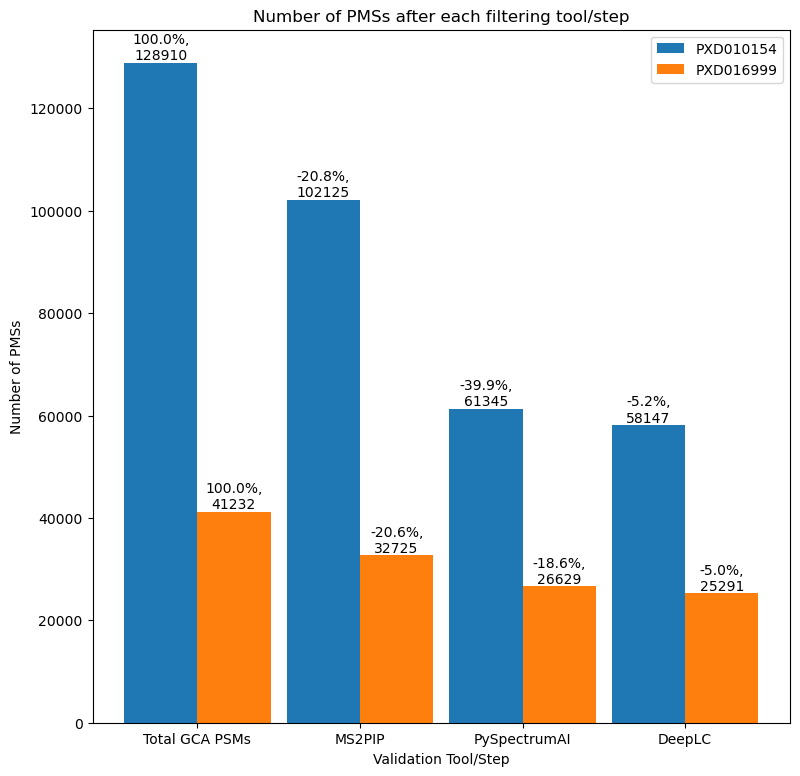

In [5]:
labels = ['Total GCA PSMs', 'MS2PIP', 'PySpectrumAI', 'DeepLC']
values1 = [all_gca_number1, ms2pip_gca_number1, ms2pip_spectrumai_gca_number1, ms2pip_spectrumai_deeplc_gca_number1]
values2 = [all_gca_number2, ms2pip_gca_number2, ms2pip_spectrumai_gca_number2, ms2pip_spectrumai_deeplc_gca_number2]

x = np.arange(len(labels)) 
plt.figure(figsize=(9,9))
bar_width = 0.45
bars1 = plt.bar(x - bar_width/2, values1, width=bar_width, align='center', label='PXD010154')
bars2 = plt.bar(x + bar_width/2, values2, width=bar_width, align='center', label='PXD016999')

plt.title('Number of PMSs after each filtering tool/step')
plt.xlabel('Validation Tool/Step')
plt.ylabel('Number of PMSs')
plt.xticks(x, labels)
plt.legend()
for i,bar in enumerate(bars1):
    num = bar.get_height()
    if i == 0:
        s = "{},\n{}".format("{:.1%}".format(1),num)
        pre = num
    else:
        percentile = (pre - num)/pre 
        s = "-{},\n{}".format("{:.1%}".format(percentile),num)
        pre = num
    plt.text(bar.get_x() + bar.get_width()/2, num, s, ha='center', va='bottom')
for i,bar in enumerate(bars2):
    num = bar.get_height()
    if i == 0:
        s = "{},\n{}".format("{:.1%}".format(1),num)
        pre = num
    else:
        percentile = (pre - num)/pre 
        s = "-{},\n{}".format("{:.1%}".format(percentile),num)
        pre = num       
    plt.text(bar.get_x() + bar.get_width()/2, num, s, ha='center', va='bottom')
plt.savefig('count-plots/filter_count-plot.svg', format='svg')

### Match GCA Infos

In [6]:
PXD010154peps = get_gca_seq_set("PXD010154/deeplc-tables/PXD010154_deeplc_filtered_95perc.csv.gz")
PXD016999peps = get_gca_seq_set("PXD016999/deeplc-tables/PXD016999_deeplc_filtered_95perc.csv.gz")
print("Number of PXD010154 peptides: {}".format(len(PXD010154peps)))
print("Number of PXD016999 peptides: {}".format(len(PXD016999peps)))
union_peps = PXD010154peps.union(PXD016999peps)
print("Number of union peptides: {}".format(len(union_peps)))
intersection_peps = PXD010154peps.intersection(PXD016999peps)
print("Number of intersection peptides: {}".format(len(intersection_peps)))

Number of PXD010154 peptides: 4056
Number of PXD016999 peptides: 1965
Number of union peptides: 5067
Number of intersection peptides: 954


In [7]:
auto = ahocorasick.Automaton()

for seq in union_peps:
    auto.add_word(seq, seq)

auto.make_automaton()

peps_prots = {}
for prot_file in tqdm(glob('protein_db/GCA_peps/*.fa')):
    prot_seqs = set()
    prots_dict = {}
    parsed_file = SeqIO.parse(prot_file, 'fasta')
    sample_name = prot_file.split('/')[-1].split('-')[1]

    for record in parsed_file:
        try:
            prots_dict[str(record.seq)].append(sample_name + ' ' +  str(record.id) + ' ' +  str(record.seq) + ' ' + str(record.description))
        except KeyError:
            prots_dict[str(record.seq)] = [sample_name + ' ' + str(record.id) + ' ' +  str(record.seq) + ' ' + str(record.description)]

    #get non-canonical peptides that are found in canonical proteins from ensembl
    found_prots = set()
    
    for prot_seq in prots_dict.keys():
        for end_ind, found in auto.iter(prot_seq):
            found_prots.add(found)
            try:
                peps_prots[found].append(prots_dict[prot_seq])
            except KeyError:
                peps_prots[found] = [prots_dict[prot_seq]]

100%|██████████| 97/97 [03:31<00:00,  2.18s/it]


In [8]:
sample_peps= {}
gene_ID_peps = {}
protein_ID_peps = {}
protein_Seq_peps = {}
transcript_ID_peps = {}
gene_symbol_peps = {}
peps_infos = {}
for pep in tqdm(union_peps):
    prots = [x.split(' ') for xs in peps_prots[pep] for x in xs]
    samples, proteins, proteins_seq, genes, gene_symbols, transcripts, gene_biotypes = set(), set(), set(), set(), set(), set(),set() 
    
    for prot in prots:
        samples.add(prot[0])
        proteins.add(prot[1])
        proteins_seq.add(prot[2])
        genes.add([x for x in prot if x.startswith('gene:')][0].split(':')[-1])
        transcripts.add([x for x in prot if x.startswith('transcript:')][0].split(':')[-1])
        gene_biotypes.add([x for x in prot if x.startswith('gene_biotype:')][0].split(':')[-1])
        
        try:
            gene_symbols.add([x for x in prot if x.startswith('gene_symbol:')][0].split(':')[-1])
        except IndexError:
            pass
    peps_infos[pep] = [','.join(gene_symbols), ','.join(gene_biotypes), ','.join(samples), ','.join(proteins), ','.join(genes), ','.join(transcripts)]

    for sample in samples:
        try:
            sample_peps[sample].add(pep)
        except KeyError:
            sample_peps[sample] = set()
            sample_peps[sample].add(pep)
    
    for gene in genes:
        try:
            gene_ID_peps[gene].add(pep)
        except KeyError:
            gene_ID_peps[gene] = set()
            gene_ID_peps[gene].add(pep)

    for prot_id in proteins:
        try:
            protein_ID_peps[prot_id].add(pep)
        except KeyError:
            protein_ID_peps[prot_id] = set()
            protein_ID_peps[prot_id].add(pep)
    
    for prot_seq in proteins_seq:
        try:
            protein_Seq_peps[prot_seq].add(pep)
        except KeyError:
            protein_Seq_peps[prot_seq] = set()
            protein_Seq_peps[prot_seq].add(pep)
            
    for transcript in transcripts:
        try:
            transcript_ID_peps[transcript].add(pep)
        except KeyError:
            transcript_ID_peps[transcript] = set()
            transcript_ID_peps[transcript].add(pep)
            
    for gene_symbol in gene_symbols:
        try:
            gene_symbol_peps[gene_symbol].add(pep)
        except KeyError:
            gene_symbol_peps[gene_symbol] = set()
            gene_symbol_peps[gene_symbol].add(pep)   

100%|██████████| 5067/5067 [00:06<00:00, 755.29it/s]


In [9]:
peps_sample_97 = dict()
peps_sample_1 = dict()
for pep,info in peps_infos.items():
    if len(info[2].split(",")) == 97:
        peps_sample_97[pep] =info
    if len(info[2].split(",")) == 1:
        peps_sample_1[pep] =info

In [10]:
peps_sample_df = pd.DataFrame(peps_sample_1).T
peps_sample_df = peps_sample_df.drop(peps_sample_df.columns[[1]], axis=1)
peps_sample_df.columns= ['gene_symbol', 'GCA samples','protein_ID','gene_ID', 'transcript_ID']
peps_sample_df.to_csv("count-tables/peps_in_OneSample.tsv", header=1, sep="\t")

In [11]:
peps_sample_df = pd.DataFrame(peps_sample_97).T
peps_sample_df = peps_sample_df.drop(peps_sample_df.columns[[1]], axis=1)
peps_sample_df.columns= ['gene_symbol', 'GCA samples','protein_ID','gene_ID', 'transcript_ID']
peps_sample_df.to_csv("count-tables/peps_in_EachSample.tsv", header=1, sep="\t")

In [12]:
print("Number of peptides: {}".format(len(union_peps)))
print("Number of GCA samples matched: {}".format(len(sample_peps)))
print("Number of gene ids matched: {}".format(len(gene_ID_peps)))
print("Number of transcript ids matched: {}".format(len(transcript_ID_peps)))
print("Number of protein ids matched: {}".format(len(protein_ID_peps)))
print("Number of protein seqs matched: {}".format(len(protein_Seq_peps)))
print("Number of gene_symbols matched: {}".format(len(gene_symbol_peps)))

Number of peptides: 5067
Number of GCA samples matched: 97
Number of gene ids matched: 87133
Number of transcript ids matched: 292294
Number of protein ids matched: 292225
Number of protein seqs matched: 29594
Number of gene_symbols matched: 2501


###  Save Infos

In [13]:
def create_info_table(info_dict, index, out_file):
    df = pd.DataFrame({'peptides': [','.join(values) for values in info_dict.values()],
                'Count': [len(values) for values in info_dict.values()]},index=info_dict.keys())
    df.index.name = index
    df.sort_values('Count', ascending=False, inplace=True)
    df.to_csv(out_file, header=1, sep="\t")

In [14]:
create_info_table(sample_peps,"GCA_sample","count-tables/sample_peps.tsv")
create_info_table(gene_ID_peps,"gene_ID","count-tables/gene_ID_peps.tsv")
create_info_table(transcript_ID_peps,"transcript_ID","count-tables/transcript_ID_peps.tsv")
create_info_table(protein_ID_peps,"protein_ID","count-tables/protein_ID_peps.tsv")
create_info_table(protein_Seq_peps,"protein_Seq","count-tables/protein_Seq_peps.tsv")
create_info_table(gene_symbol_peps,"gene_symbol","count-tables/gene_symbol_peps.tsv")

In [15]:
gene_symbol_peps_df = pd.read_table("count-tables/gene_symbol_peps.tsv")

gene_symbol_peps_df = gene_symbol_peps_df[gene_symbol_peps_df['Count']>=10].sort_values('Count', ascending=False)
print("Number of gene_symbol with more than 10 peptides: {}".format(len(gene_symbol_peps_df)))

Number of gene_symbol with more than 10 peptides: 39


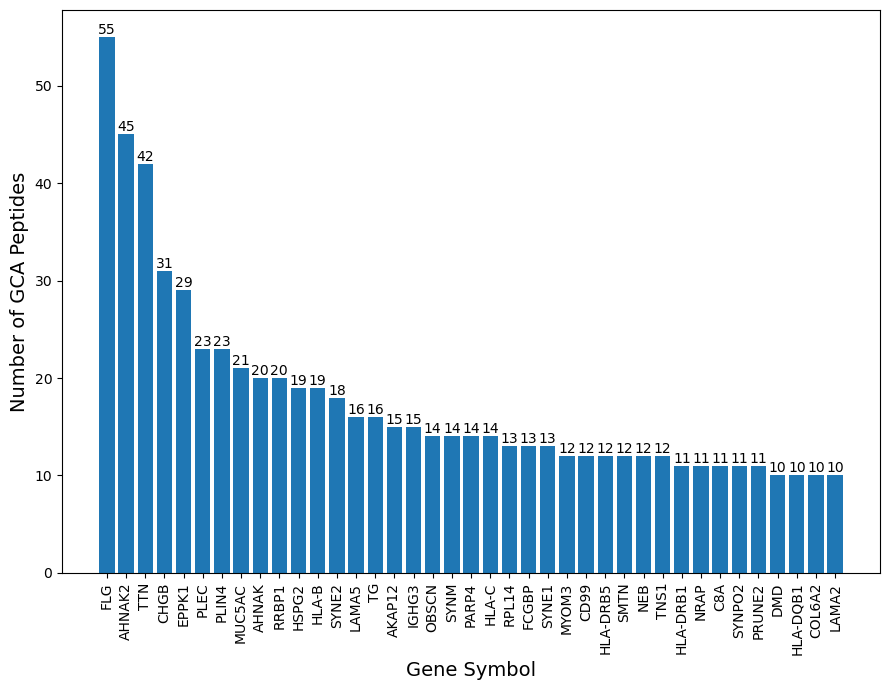

In [16]:
plt.figure(figsize=(9,7))
bar_width = 0.8
bars = plt.bar(gene_symbol_peps_df['gene_symbol'],gene_symbol_peps_df['Count'], width=bar_width, align='center')
plt.xlabel('Gene Symbol', fontsize=14)  
plt.ylabel('Number of GCA Peptides', fontsize=14) 
plt.xticks(rotation='vertical')  
plt.tight_layout()  
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

plt.savefig('count-plots/gene_sybol-peps-plot.svg', format='svg')

### PeptideAtlas Count

In [17]:
column_names = ['PeptideAccession', 'observations', 'best score', 'peptide sequence','']
PeptideAtlas = pd.read_table("protein_db/PeptideAtlasInput_concat.PAidentlist.peptideSummary",header=None,names=column_names)
PeptideAtlas_dict = dict(zip(PeptideAtlas['peptide sequence'], PeptideAtlas['observations']))

In [18]:
peps_PeptideAtlas = pd.DataFrame(list(union_peps), columns=['sequence'])
peps_PeptideAtlas["PeptideAtlas Observations"] = peps_PeptideAtlas['sequence'].apply(lambda x: PeptideAtlas_dict[x] if PeptideAtlas_dict.get(x) else 0)

peps_PeptideAtlas.to_csv("count-tables/peps_PeptideAtlas.tsv", header=1, sep="\t",index = None)

In [19]:
print("Number of observations<=10 GCA peptide:",len(peps_PeptideAtlas[peps_PeptideAtlas['PeptideAtlas Observations']<=10]))

Number of observations<=10 GCA peptide: 3379


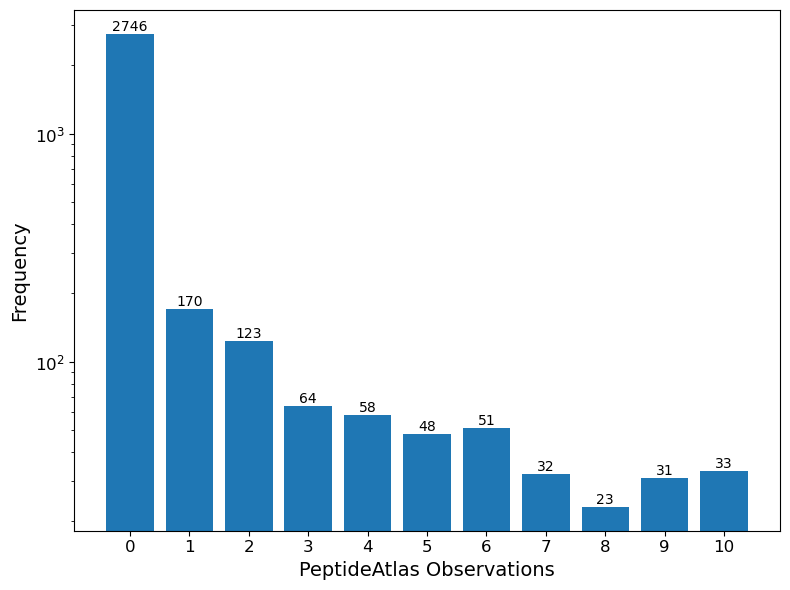

In [20]:
value_counts = peps_PeptideAtlas[peps_PeptideAtlas['PeptideAtlas Observations']<=10]['PeptideAtlas Observations'].value_counts()

plt.figure(figsize=(8,6))

bars = plt.bar(value_counts.index, value_counts.values)
plt.xlabel('PeptideAtlas Observations', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yscale('log')
plt.xticks(value_counts.index, fontsize=12) 
plt.yticks(fontsize=12)
plt.tight_layout()  
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

plt.savefig('count-plots/peps_PeptideAtlas-plot.svg', format='svg')
plt.show()

In [21]:
print("Number of observations=0 GCA peptide:",len(peps_PeptideAtlas[peps_PeptideAtlas['PeptideAtlas Observations']==0]))
print("Number of 0<observations<=10 GCA peptide:",len(peps_PeptideAtlas[(peps_PeptideAtlas['PeptideAtlas Observations']<=10) & (peps_PeptideAtlas['PeptideAtlas Observations']>0)]))

Number of observations=0 GCA peptide: 2746
Number of 0<observations<=10 GCA peptide: 633


### Tissue Count

In [22]:
sdrf_010154 = pd.read_table("PXD010154/sdrf_parquet/PXD010154.sdrf.tsv")
sdrf_016999_first = pd.read_table("PXD016999/sdrf_parquet/PXD016999-first-instrument.sdrf.tsv")
sdrf_016999_second = pd.read_table("PXD016999/sdrf_parquet/PXD016999-second-instrument.sdrf.tsv")
sdrf_016999 = pd.concat([sdrf_016999_first, sdrf_016999_second], axis=0, ignore_index=True)

In [23]:
def get_sdrf_info(sdrf):
    sdrf["reference_file_name"] = sdrf['comment[data file]'].str.split(".", expand=True)[0]
    file_tissue = sdrf[['characteristics[organism part]','reference_file_name']].drop_duplicates()
    file_tissue = file_tissue.groupby('reference_file_name')['characteristics[organism part]'].apply(list).reset_index()
    
    file_sample = sdrf[['source name','reference_file_name']].drop_duplicates()
    file_sample = file_sample.groupby('reference_file_name')['source name'].apply(list).reset_index()
    
    # file_tissue_map: file -> tissue
    file_tissue_map = file_tissue.set_index('reference_file_name').to_dict()['characteristics[organism part]']
    # file_sample_map: file -> sample
    file_sample_map = file_sample.set_index('reference_file_name').to_dict()['source name']

    # tissue_fileNumbers: tissue -> files_number
    tissue_fileNumbers = sdrf[['characteristics[organism part]','reference_file_name']].drop_duplicates()['characteristics[organism part]'].value_counts()
    # tissue_sampleNumbers: tissue -> samples_number
    tissue_sampleNumbers = sdrf[['characteristics[organism part]','source name']].drop_duplicates()['characteristics[organism part]'].value_counts()

    tissue_file = sdrf[['characteristics[organism part]','reference_file_name']].drop_duplicates()
    tissue_file = tissue_file.groupby('characteristics[organism part]')['reference_file_name'].apply(list).reset_index()
    # tissue_file_map: tissue -> file
    tissue_file_map = tissue_file.set_index('characteristics[organism part]').to_dict()['reference_file_name']
    
    return [file_tissue_map, file_sample_map, tissue_fileNumbers, tissue_sampleNumbers, tissue_file_map]

In [24]:
PXD010154_sdrf_info = get_sdrf_info(sdrf_010154)
PXD016999_sdrf_info = get_sdrf_info(sdrf_016999)

In [25]:
def plot_PSMs(parquet_file1, parquet_file2, sdrf_info, path):
    if parquet_file2:
        table1 = pq.read_table(parquet_file1, columns=["reference_file_name"])
        parquet1 = table1.to_pandas()

        table2 = pq.read_table(parquet_file2, columns=["reference_file_name"])
        parquet2 = table2.to_pandas()

        from_parquet = pd.concat([parquet1, parquet2], axis=0, ignore_index=True)
    else:
        table = pq.read_table(parquet_file1, columns=["reference_file_name"])
        from_parquet = table.to_pandas()

    from_parquet["organism part"] = from_parquet["reference_file_name"].map(sdrf_info[0])
    from_parquet = from_parquet.explode("organism part", ignore_index=True)

    value_counts = from_parquet['organism part'].value_counts()

    unique_keys = value_counts.index.tolist()
    nums_list = [sdrf_info[2].get(key, "") for key in unique_keys]

    plt.figure(figsize=(10,9))
    bar_width = 0.8
    bars = plt.bar(value_counts.index, value_counts.values)
    plt.xlabel('Tissue', fontsize=14)
    plt.ylabel('Number of PSMs', fontsize=14)
    
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    for i,bar in zip(nums_list,bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(i), ha='center', va='bottom', fontsize=8)
        
    plt.xticks(rotation='vertical')  
    plt.tight_layout()  
    # plt.savefig('/mnt/nfs/wangd/project/paper_db/count/count-plot/tissue_distribution_from_parquet.svg', format='svg')
    plt.show()

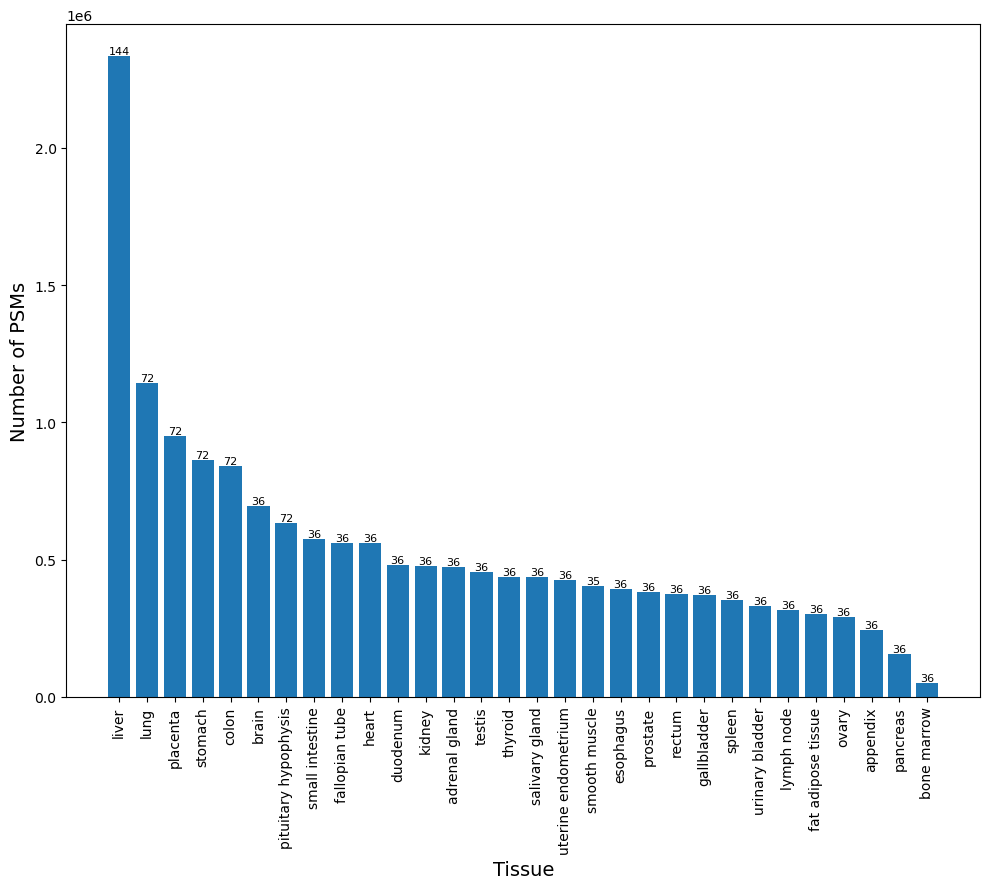

In [26]:
plot_PSMs("PXD010154/sdrf_parquet/PXD010154-1de73bcb-ee3e-4d19-9d8d-da72f11d5fac.psm.parquet",
         False,
         PXD010154_sdrf_info, "count-plots/PXD010154-tissue_PSMs-plot.svg")

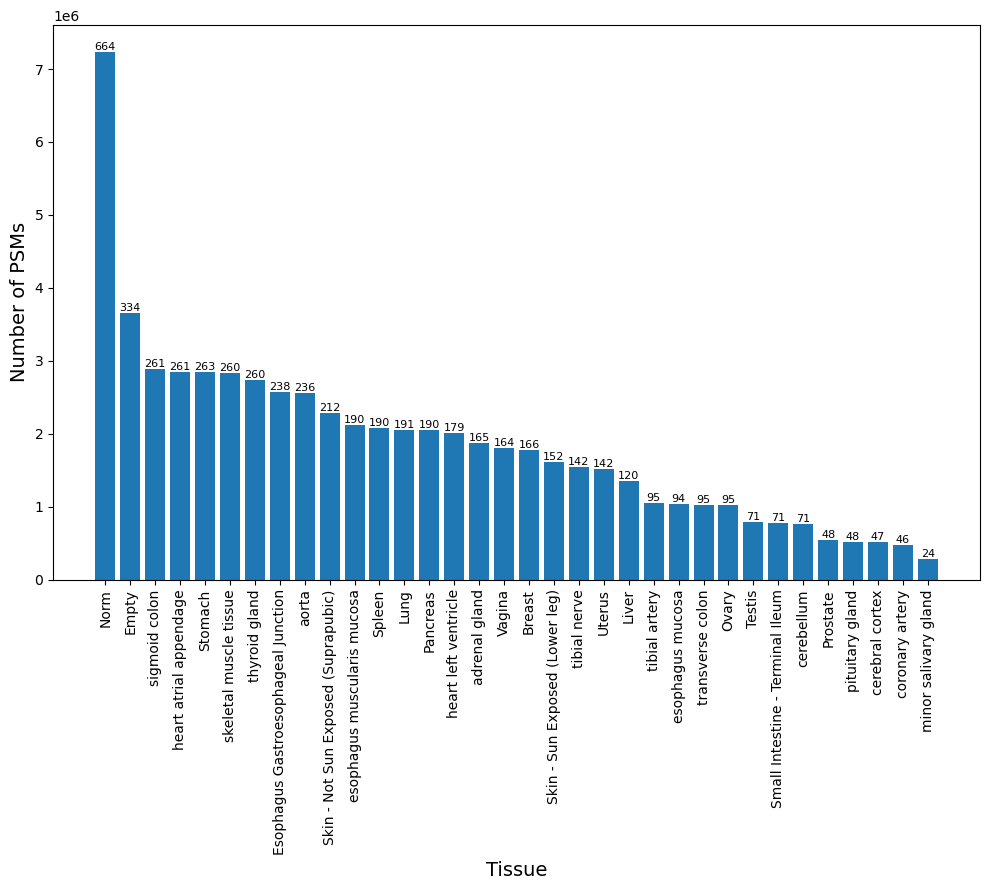

In [27]:
plot_PSMs("PXD016999/sdrf_parquet/PXD016999-first-instrument-8b005cd8-d641-4d1e-a085-c92ed045b4da.psm.parquet",
         "PXD016999/sdrf_parquet/PXD016999-second-instrument-2739df94-8ceb-4033-a8d3-91adba121f3f.psm.parquet",
         PXD016999_sdrf_info, "count-plots/PXD016999-tissue_PSMs-plot.svg")

In [28]:
def plot_Spectra(RAWs_PATH, sdrf_info, path):
    tissue_MS = dict()
    for tissue,mzmls in tqdm(sdrf_info[4].items()):
        msms_num = 0
        for mzml in mzmls:
            file_path = RAWs_PATH + mzml.split(".")[0] + '.mzML'
            exp = MSExperiment()
            if os.path.exists(file_path):
                try:
                    MzMLFile().load(file_path, exp)
                    for scan in exp:
                        if scan.getMSLevel() == 2:  
                            msms_num += 1
                except RuntimeError:
                    print(file_path + "ERROR！")
            else:
                # print(file_path + "not found")
                continue
                
        tissue_MS[tissue] = msms_num
    
    sorted_tissue_MS = sorted(tissue_MS.items(), key=lambda x: x[1], reverse=True)
    sorted_tissues = [tissue[0] for tissue in sorted_tissue_MS]
    sorted_values = [tissue[1] for tissue in sorted_tissue_MS]

    plt.figure(figsize=(10,9))
    bar_width = 0.8
    bars = plt.bar(sorted_tissues, sorted_values, width=bar_width, align='center')
    plt.xlabel('Tissue', fontsize=14)  
    plt.ylabel('Number of Spectra', fontsize=14) 
    plt.xticks(rotation='vertical', fontsize=10)  
    plt.yticks(fontsize=10)  
    plt.tight_layout()  
    
    nums_list = [sdrf_info[2].get(tissue, "") for tissue in sorted_tissues]
    
    for i,bar in zip(nums_list,bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(i), ha='center', va='bottom', fontsize=8)
    
    plt.savefig(path, format='png')

100%|██████████| 30/30 [00:00<00:00, 2765.11it/s]


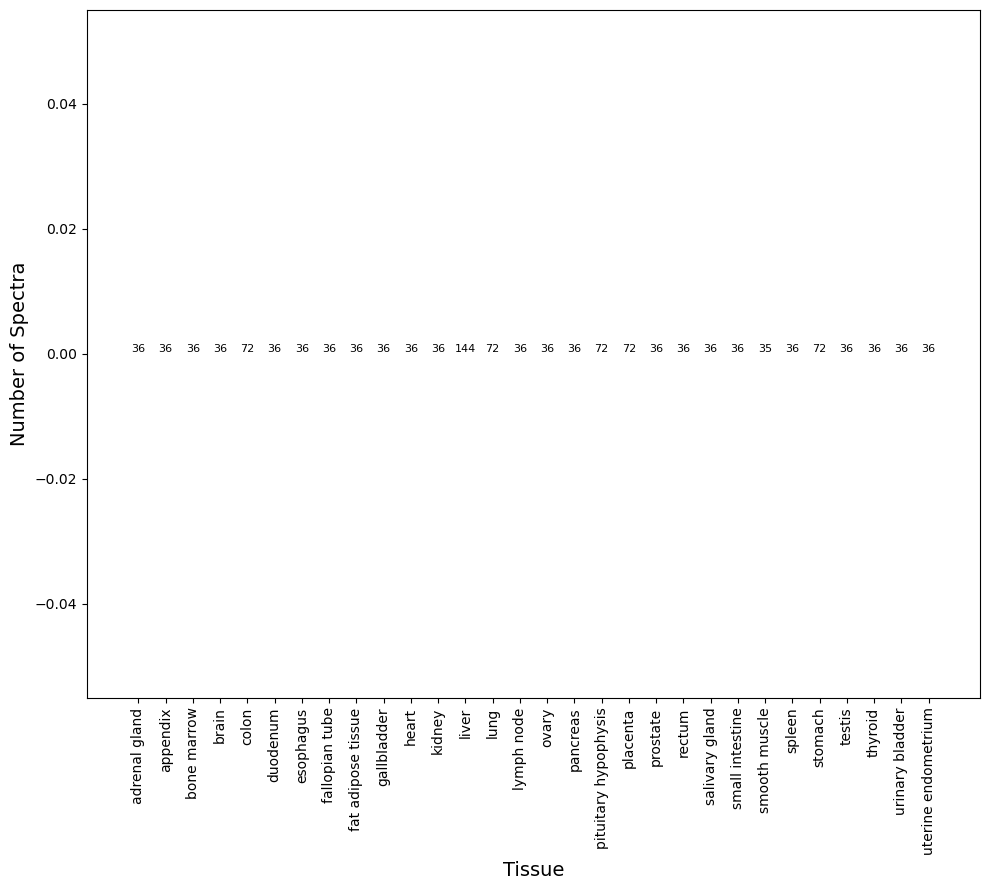

In [29]:
plot_Spectra("/home1/wangd/project/PXD010154/", PXD010154_sdrf_info, "count-plots/PXD010154-tissue_Spectra-plot.svg")

100%|██████████| 34/34 [03:15<00:00,  5.76s/it]


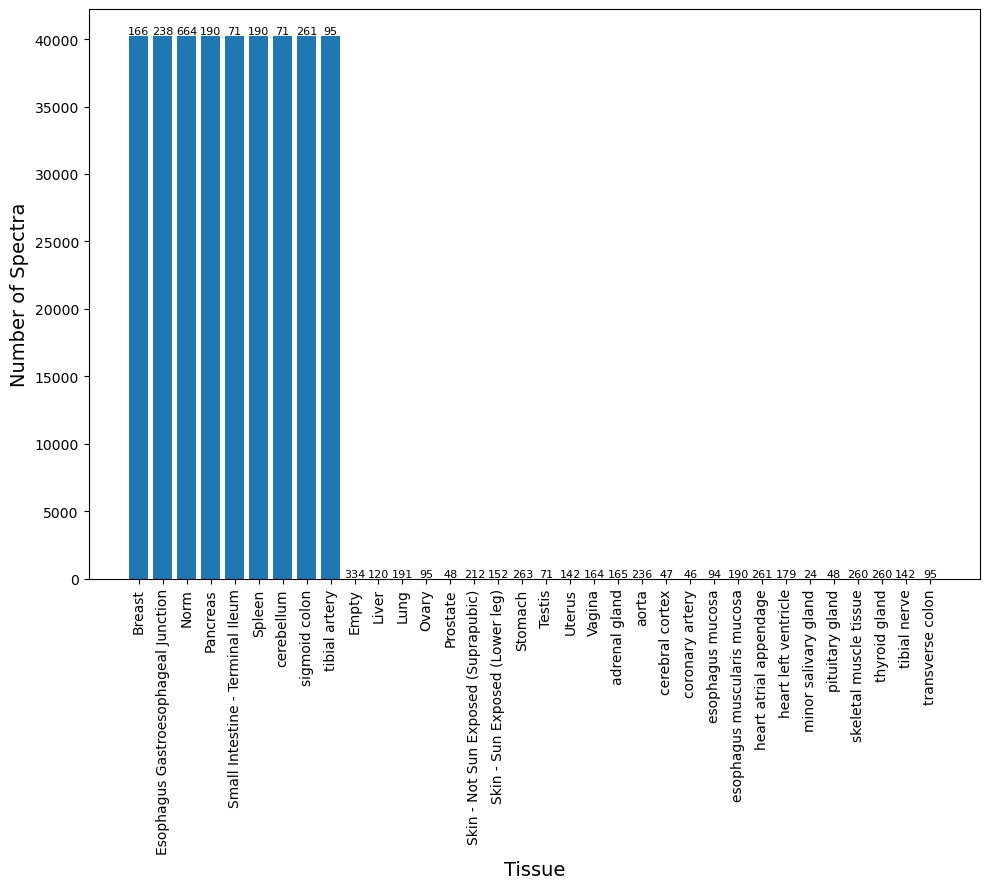

In [30]:
plot_Spectra("/home1/wangd/project/PXD016999/", PXD016999_sdrf_info, "count-plots/PXD016999-tissue_Spectra-plot.svg")

In [31]:
def plot_RAWs(sdrf_info, path):
    sorted_tissue_files = sorted(sdrf_info[2].items(), key=lambda x: x[1], reverse=True)
    sorted_tissues = [tissue[0] for tissue in sorted_tissue_files]
    sorted_values = [tissue[1] for tissue in sorted_tissue_files]
    
    plt.figure(figsize=(10,9))
    bar_width = 0.8
    bars = plt.bar(sorted_tissues, sorted_values, width=bar_width, align='center')
    plt.xlabel('Tissue', fontsize=14)  
    plt.ylabel('Number of RAWs', fontsize=14) 
    plt.xticks(rotation='vertical', fontsize=10)  
    plt.yticks(fontsize=10) 
    plt.tight_layout()  
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom', fontsize=8)

    plt.savefig(path, format='png')

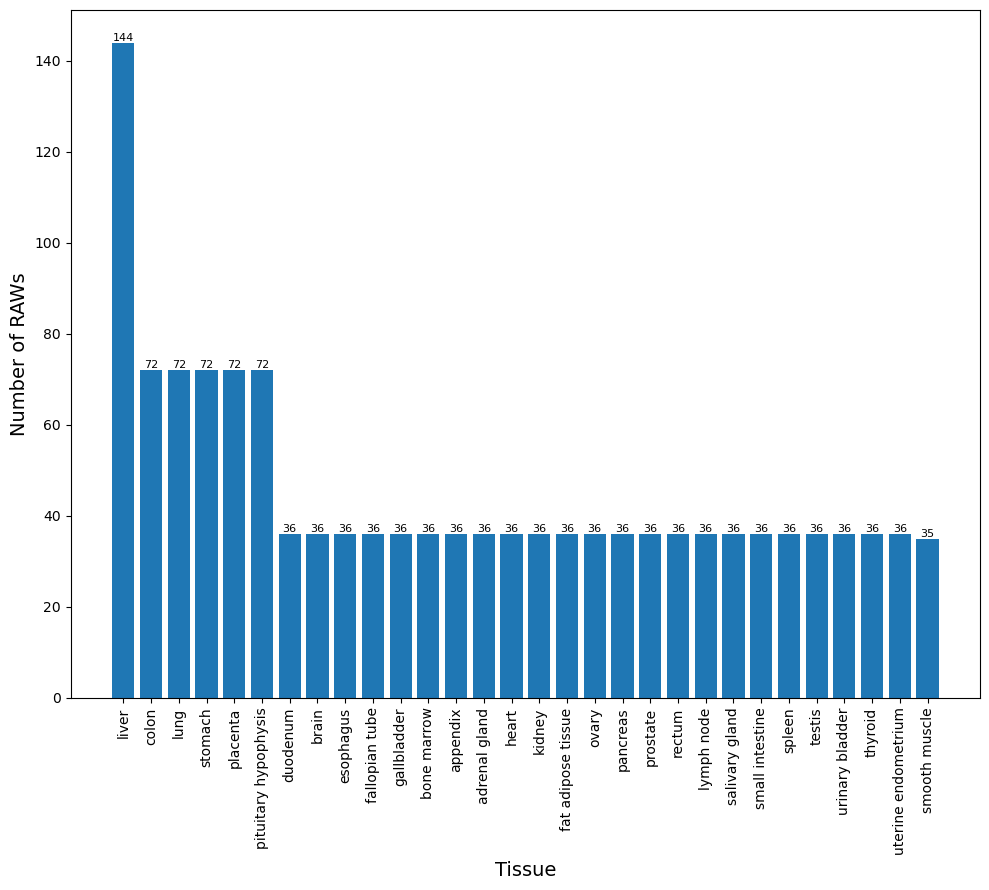

In [32]:
plot_RAWs(PXD010154_sdrf_info, "count-plots/PXD010154-tissue_RAWs-plot.svg")

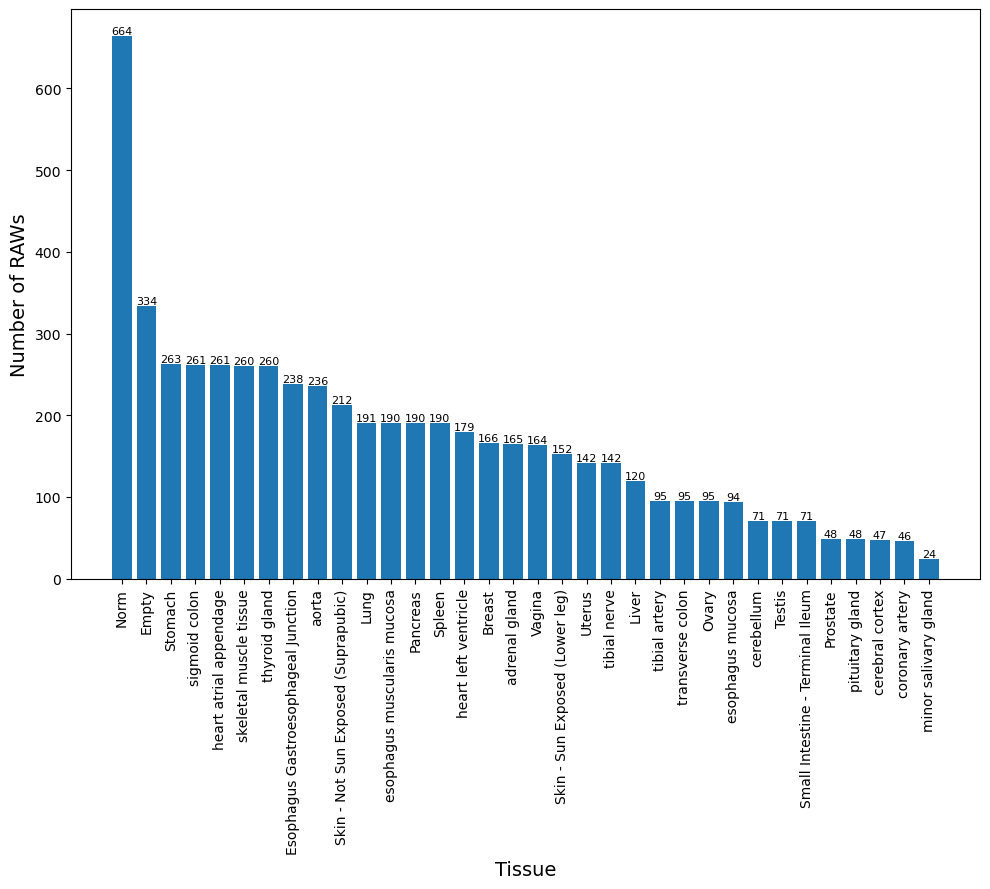

In [33]:
plot_RAWs(PXD016999_sdrf_info, "count-plots/PXD016999-tissue_RAWs-plot.svg")

In [34]:
def save_tissue_file_peps(file, sdrf_info, reference_file_peps_path ,tissue_peps_path):
    df = pd.read_table(file, sep = "," ,compression="gzip")
    df = df[['sequence','reference_file_name']].drop_duplicates()

    reference_file_pep_info = {}
    tissue_pep_info = {}
    for index, row in df.iterrows():
        sequence = row["sequence"]
        reference_file = row["reference_file_name"]
        tissues = sdrf_info[0][reference_file]
        
        if reference_file_pep_info.get(reference_file):
            reference_file_pep_info[reference_file].add(sequence)
        else:
            reference_file_pep_info[reference_file]= set()
            reference_file_pep_info[reference_file].add(sequence)
            
        for tissue in tissues:
            if tissue_pep_info.get(tissue):
                tissue_pep_info[tissue].add(sequence)
            else:
                tissue_pep_info[tissue]= set()
                tissue_pep_info[tissue].add(sequence)
                
    create_info_table(reference_file_pep_info, "reference_file", reference_file_peps_path)
    create_info_table(tissue_pep_info, "tissue", tissue_peps_path)
    
    tissue_pep = pd.read_table(tissue_peps_path)
    tissue_pep["RAWs_nums"] = tissue_pep["tissue"].map(sdrf_info[2])
    tissue_pep["Sample_nums"] = tissue_pep["tissue"].map(sdrf_info[3])
    tissue_pep.to_csv(tissue_peps_path, header=1, sep="\t",index = None)

In [35]:
save_tissue_file_peps("PXD010154/deeplc-tables/PXD010154_deeplc_filtered_95perc.csv.gz", 
                      PXD010154_sdrf_info, 
                      "count-tables/PXD010154-reference_file_peps.tsv",
                      "count-tables/PXD010154-tissue_peps.tsv")

save_tissue_file_peps("PXD016999/deeplc-tables/PXD016999_deeplc_filtered_95perc.csv.gz", 
                      PXD016999_sdrf_info, 
                      "count-tables/PXD016999-reference_file_peps.tsv",
                      "count-tables/PXD016999-tissue_peps.tsv")

In [36]:
def plot_final_peps(file, path):
    df = pd.read_table(file)
    index = df.columns[0]
    df = df.sort_values('Count', ascending=False)
    
    plt.figure(figsize=(12,10))
    bar_width = 0.8
    plt.bar(df[index], df['Count'], width=bar_width, align='center')
    plt.xlabel(index, fontsize=14)  
    plt.ylabel('Number of GCA peptides', fontsize=14) 
    plt.xticks(rotation='vertical', fontsize = 10)  
    plt.yticks(fontsize = 10)  
    
    plt.tight_layout()  
    for i, (count, num) in enumerate(zip(df['Count'], df['RAWs_nums'])):
        plt.text(i, count, f"{count}\n({num})", ha='center', va='bottom', fontsize=8)
    plt.savefig(path, format='svg')

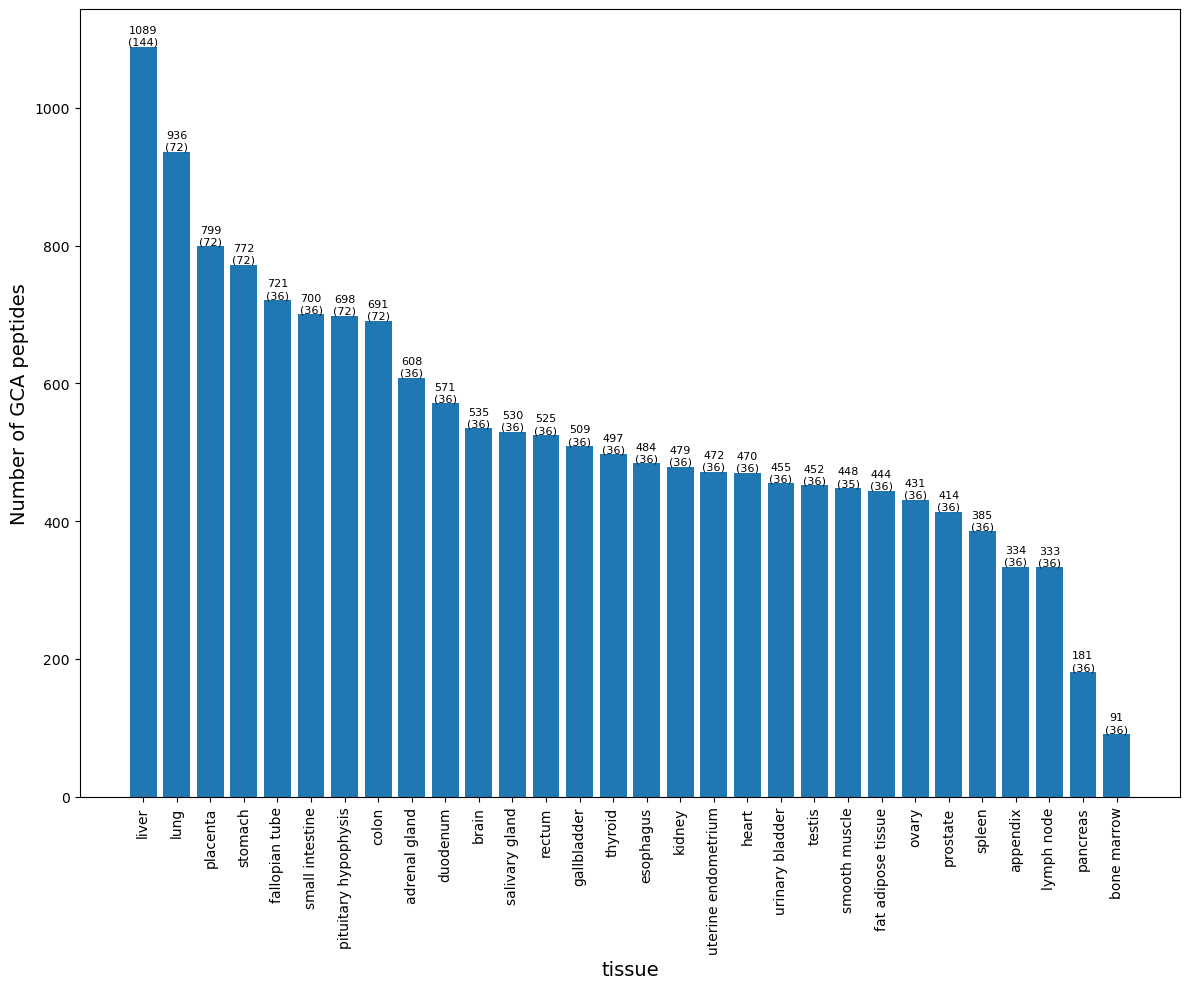

In [37]:
plot_final_peps("count-tables/PXD010154-tissue_peps.tsv", "count-plots/PXD010154-tissue_peps-plot.svg")

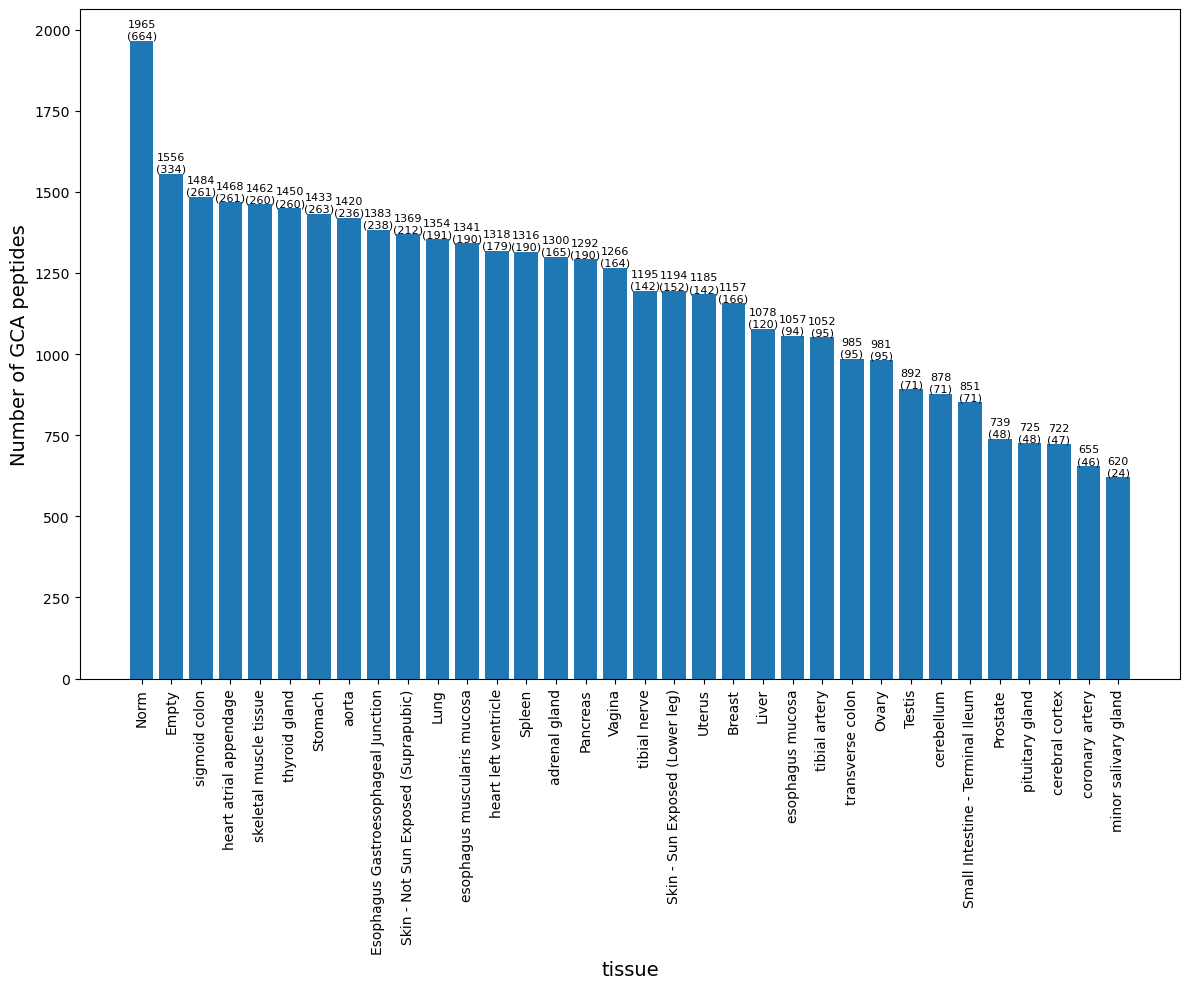

In [38]:
plot_final_peps("count-tables/PXD016999-tissue_peps.tsv", "count-plots/PXD016999-tissue_peps-plot.svg")

### GCA Sample Count

In [39]:
def get_group_peps_number(group):
    pep_unique = set()
    for peps in group["peps"].to_list():
        pep_unique = pep_unique.union(set(peps.split(",")))
    return len(pep_unique)  

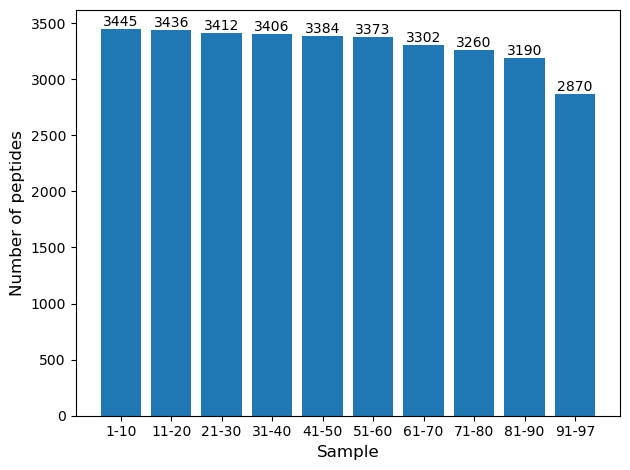

In [40]:
df = pd.read_table("count-tables/sample_peps.tsv")
df = df.sort_values('Count', ascending=False)
bar_width = 0.9

groups = [df.iloc[i:i+10] for i in range(0, len(df), 10)]

group_sums = [get_group_peps_number(group) for group in groups]
group_sums =  sorted(group_sums, reverse=True)
plt.bar(range(1, 11), group_sums)
for i, group_sum in enumerate(group_sums):
    plt.text(i + 1, group_sum, str(group_sum), ha='center', va='bottom')
    
plt.xlabel('Sample',fontsize = 12)
plt.ylabel('Number of peptides',fontsize = 12)
plt.xticks(range(1, 11), ['{}-{}'.format(i*10+1, min((i+1)*10, 97)) for i in range(10)], fontsize = 10)
plt.tight_layout()  

plt.savefig('count-plots/gca_sample-plot.svg', format='svg')

In [41]:
### Variation Type Count

# create_info_table(variation_type,"VariationType","/mnt/nfs/wangd/project/paper_db/count/variation_type_peps.tsv")

# all_variation_nums = substitution_nums + insertion_nums + deletion_nums + novel_nums

# sizes = [substitution_nums / all_variation_nums * 360, 
#          novel_nums / all_variation_nums * 360,
#          insertion_nums / all_variation_nums * 360, 
#          deletion_nums / all_variation_nums * 360]
# labels = ['Substitution: \n{}'.format("{:.2%}".format(substitution_nums / all_variation_nums)), 
#           'Novel: \n{}'.format("{:.2%}".format(novel_nums / all_variation_nums)),
#           'Insertion: \n{}'.format("{:.2%}".format(insertion_nums / all_variation_nums)),  
#           'Deletion: \n{}'.format("{:.2%}".format(deletion_nums / all_variation_nums))]

# colors = ['lightcoral', 'lightblue', 'lightsalmon', 'lightgreen']

# plt.figure(figsize=(6, 6))

# plt.pie(sizes, startangle=90, colors=colors)
 
# plt.legend(labels, loc='upper left', bbox_to_anchor=(0.9, 1))

# plt.title('Variation Type Count', fontsize=14)

# plt.savefig('/mnt/nfs/wangd/project/paper_db/count/count-plot/Variation_Type_Count-peps-plot.svg', format='svg')


### variants Count

In [42]:
match_info = pd.read_table("/mnt/nfs/wangd/project/paper_db/count/blast_canonical_count/peptide_gene_symbol_protein_matching_info.tsv")

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/nfs/wangd/project/paper_db/count/blast_canonical_count/peptide_gene_symbol_protein_matching_info.tsv'

In [ ]:
match_info

In [ ]:
len(set(match_info["gene_ID"].to_list()))

In [ ]:
len(set(match_info["canonical_protein_seq"].to_list()))

###  seven variants PSM Number

In [ ]:
variants = ["LLRDPADATEAHESSSRGEAGAPGEEDIQGPTKADTEK",
            "ERADEPQWSLYPSNSQVSEEVKTR",
            "SQREDEEEEEGENYQKGEQGEDSSEEKHLEEPGETQNAFLNERK",
            "EKSSQESGEEAGSQENHPQESKGQPR",
            "DHHSTHYRASEEEPEYGEEIKGYPGVQGPEDLEWERYRGR",
            "APRPQSEESLDEEDKR",
            "MAHGYGEESEEERGLEPGKGHHHR"
           ]

In [ ]:
from_parquet

In [ ]:
for var in variants:
    print(len(from_parquet[from_parquet["sequence"].apply(lambda x: x in var)]))

In [ ]:
df_var_list = []
for var in variants:
    df_var = passed_spectrumAI[passed_spectrumAI["sequence_x"].apply(lambda x: x in var)]
    df_var_list.append(df_var)
seven_df_var = pd.concat(df_var_list, ignore_index=True)
seven_df_var['from_seq'] = ""
for var in variants:
    seven_df_var['from_seq'] = seven_df_var.apply(lambda x: var if not x["from_seq"] and x["sequence_x"] in var else x["from_seq"],axis = 1)
seven_df_var["tissue"] = seven_df_var["reference_file_name"].map(file_tissue_map['characteristics[organism part]'])   

In [ ]:
seven_df_var.to_csv("/mnt/nfs/wangd/project/paper_db/count/seven_variants.tsv", header=1, sep="\t",index = None)

In [ ]:
seven_df_var[["sequence_x","from_seq"]].to_csv("/mnt/nfs/wangd/project/paper_db/count/seven_variants_seq.tsv", header=1, sep="\t",index = None)

In [ ]:
plt.figure(figsize=(3,5))
value_counts = seven_df_var["tissue"].value_counts()
bar_width = 0.5
bars = plt.bar(value_counts.index, value_counts.values,width=bar_width)
plt.xlabel('Tissue', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(rotation=45)
plt.tight_layout()  
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

# plt.savefig('/mnt/nfs/wangd/project/paper_db/count/count-plot/observations.svg', format='svg')
plt.show()

In [ ]:
seven_df_var["from_seq"].value_counts()

In [ ]:
value_counts = seven_df_var["from_seq"].value_counts()

bar_width = 0.9
saavs = ["A","N","Q","T","G","L","H"]
# bars = plt.bar(value_counts.index, value_counts.values,width=bar_width)
bars = plt.bar(saavs, value_counts.values,width=bar_width)
plt.xlabel('Variants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=0)
# plt.tight_layout()  
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

# plt.savefig('/mnt/nfs/wangd/project/paper_db/count/count-plot/observations.svg', format='svg')
plt.show()